<a href="https://colab.research.google.com/github/brip/SC22-BatchC-shimmering-pythons/blob/main/Emily_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precision: 0.688
0.6492950304513474


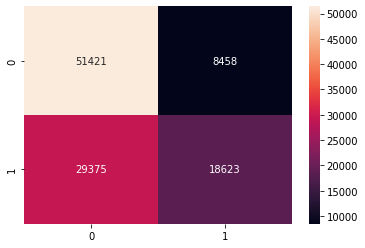

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

data = pd.read_csv("/content/Data/Airlines.csv")
columns_to_drop=["id","Flight"]
data.drop(columns_to_drop, axis=1, inplace = True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

target = data["Delay"]
input_columns = data.loc[:, data.columns != "Delay"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2,random_state=42)

numerical_cols = [cname for cname in x_train.columns if x_train[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in x_train.columns if x_train[cname].dtype == "object"]

numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = XGBClassifier()

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

my_pipeline.fit(x_train, y_train)
preds = my_pipeline.predict(x_test)
score = accuracy_score(y_test,preds)
precision = precision_score(y_test, preds, average='binary')

print('Precision: %.3f' % precision)
print(score)
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='g')

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/Data/Airlines.csv")
columns_to_drop=["id","Flight"]
data.drop(columns_to_drop, axis=1, inplace = True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.drop(labels=range(269691, 539383), axis=0)

target = data["Delay"]
input_columns = data.loc[:, data.columns != "Delay"]
scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2,random_state=42)

numerical_cols = [cname for cname in x_train.columns if x_train[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in x_train.columns if x_train[cname].dtype == "object"]

numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = RandomForestClassifier(n_estimators=100)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

my_pipeline.fit(x_train, y_train)
preds = my_pipeline.predict(x_test)
score = accuracy_score(y_test,preds)
precision = precision_score(y_test, preds, average='binary')

print('Precision: %.3f' % precision)
print(score)
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='g')